_____
# **K-MEANS CLUSTERING**
________

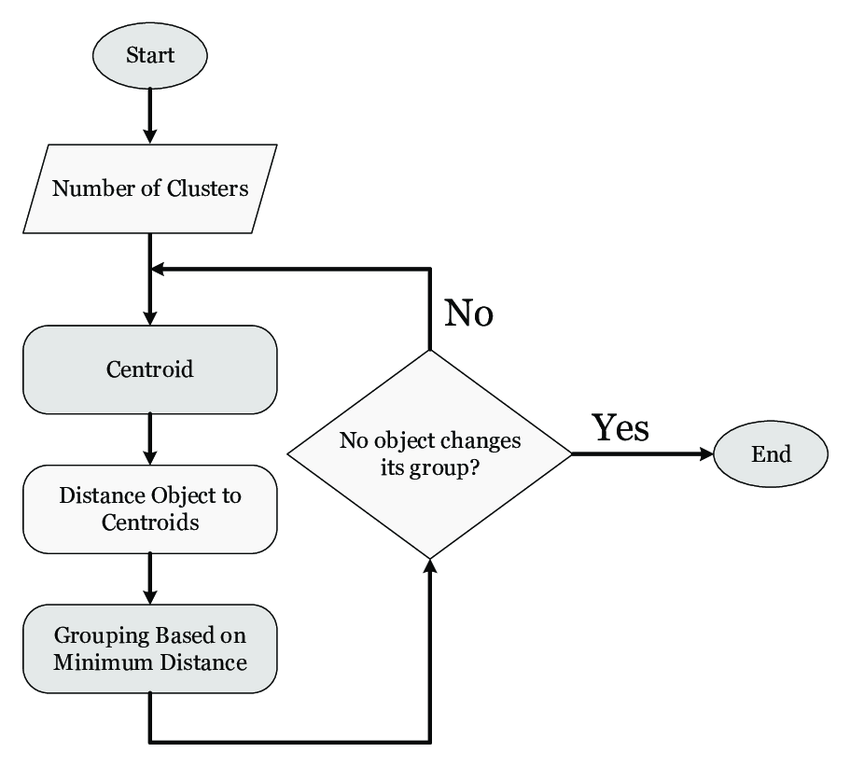

K-Means is one of the most widely used unsupervised learning algorithms for clustering. A set of data points is to be divided into K clusters using K-means, with each cluster having its own centroid and its data points being closer to its centroid than to the others.  To reduce the variation within each cluster, the algorithm iteratively operates.

Here’s a breakdown of the logic and the steps involved in the K-Means algorithm:

#### 1.  **Initialization**:

 - Choose `K` initial centroids randomly (or based on some other strategy like K-means++).

#### 2.  **Assignment Step**:

- Assign each data point to the nearest centroid. The distance is usually calculated using **Euclidean distance**:
    
 $$
   \text{distance}(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

Where $x$ and $y$ are the two data points and $n$ is the number of features.


 #### 3.   **Update Step**:

   - After assigning all points to their closest centroids, compute the new centroid of each cluster by taking the mean of all data points assigned to that centroid. This is mathematically expressed as:
    
$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$

Where $\mu_k$ is the new centroid of cluster $C_k$, and $|C_k|$ is the number of points in cluster $C_k$.

 #### 4. **Repeat**:

   - Repeat the **Assignment Step** and **Update Step** until the centroids no longer change, or the changes are sufficiently small (convergence).

### **K-Means Objective Function: Minimizing Within-Cluster Variance**

The core objective of K-means is to minimize the **within-cluster sum of squared distances** (WCSS), which can be expressed as:

$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

Where:
- $J$ is the total within-cluster variance,
- $C_k$ is the set of points assigned to cluster $k$,
- $\mu_k$ is the centroid of cluster $k$,
- $\| x_i - \mu_k \|$ is the Euclidean distance between a point $x_i$ and the centroid $\mu_k$.

## **Task For this Notebook**

The task for this notebook is that K-means clustering will be applied to the Iris dataset


### Required Libraries

The libraries required to achieve the task of this notebook are:

- **numpy** → Handle numerical operations and array data.
- **pandas** → Load and manipulate structured data (though not strictly needed for the Iris dataset, it's useful for custom datasets).
- **matplotlib.pyplot** → Create visualizations, like plotting the clusters.
- **sklearn.cluster** → Implement the KMeans algorithm for clustering.
- **sklearn.datasets** → Access built-in datasets like the Iris dataset.
- **sklearn.decomposition** → Perform dimensionality reduction (PCA) for visualization.



### Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


### Load Data



In [16]:
iris = load_iris()

# Convert the data into a pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data Types and Columns (Data Exploration)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Data Cleaning

In [18]:
# Number of missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [19]:
# Number of duplicates


duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 1


Duplicates were found so we must drop it

In [20]:
df = df.drop_duplicates()

### Listing the columns of the data set

The columns in this data set are as follows;

In [21]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

### Initializing the Features and Target


In [22]:
X = iris.data 
y = iris.target  

### Applying the K-Means clustering



In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters (based on the number of species we know)
kmeans.fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

### Plotting the Clusters

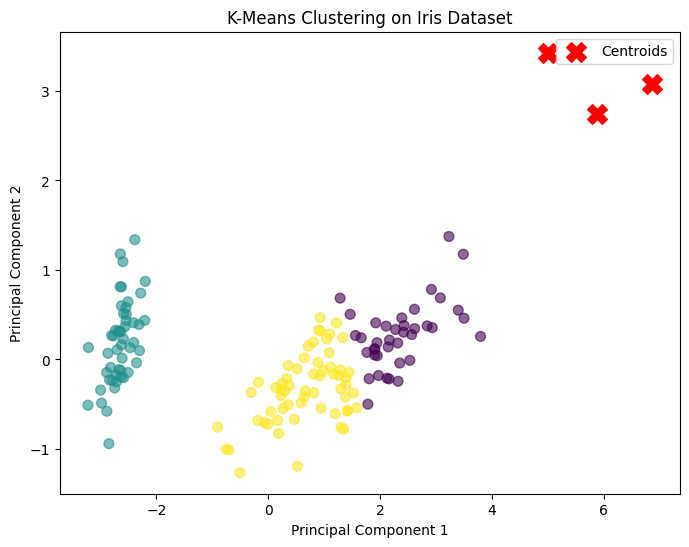

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

**Key Observation from Graph**

- Based on feature similarity, the K-Means algorithm effectively divided the iris species into groups.

- Certain species may have traits in common, according to some overlapping points, which makes categorization a little difficult.

- Changing K values or attempting a different clustering technique (such as hierarchical clustering or Gaussian Mixture Models) could enhance separation if you're looking for greater accuracy.

In [25]:
# Print out the cluster centroids
print("Cluster Centroids (in original feature space):")
print(centroids)

Cluster Centroids (in original feature space):
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


#### **Cluster Centriods**

**Cluster 1 (Centroid 1):**

- Sepal Length: 6.85

- Sepal Width: 3.08

- Petal Length: 5.72

- Petal Width: 2.05

**Cluster 2 (Centroid 2):**

- Sepal Length: 5.01

- Sepal Width: 3.43

- Petal Length: 1.46

- Petal Width: 0.25

**Cluster 3 (Centroid 3):**

- Sepal Length: 5.88

- Sepal Width: 2.74

- Petal Length: 4.39

- Petal Width: 1.43

These centroids represent the average features of the flowers in each cluster. Notice that:

- Cluster 2 seems to correspond to the smaller flowers with lower values for petal length and width (likely representing the Setosa species).

- Cluster 1 and Cluster 3 have larger values for petal length and width, suggesting they might represent Versicolor and Virginica species, respectively.

### Evaluation

In [26]:

from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(X, labels)
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.551


**What this means**

- A score of 0.551 suggests that the clustering is relatively good, but there is still room for improvement. The fact that it is above 0.5, which is typically regarded as a moderate result, suggests that the clusters are not entirely different but are rather well-separated.

- If the score is in the positive range, it means that the clusters have greater significance than if it were around zero or negative.
  

## **Conclusion of Notebook**

In this notebook, we successfully applied the **K-Means clustering algorithm** to the Iris dataset, which contains data on three different species of iris flowers. We performed the following steps:

**Data Preparation**: We extracted the feature set for clustering after loading the Iris dataset.
 2. **K-Means Clustering**: Because the dataset contains three species, we clustered the data into three clusters using the K-means technique.
 3. **Cluster Visualization**: To reduce dimensionality, we used **PCA (Principal Component Analysis)** to show the generated clusters in two dimensions.  The centroids of each cluster were calculated and shown, and the clusters seemed to be well separated.
 **Silhouette Score Evaluation**: The clustering was somewhat successful, with reasonably identifiable clusters but still space for improvement, according to the **Silhouette Score** of 0.551.


Although there was some overlap between the clusters, as shown by the silhouette score, the resulting clusters largely correlate to the various irise species.  Although this score indicates that the clustering is reasonable, it might be further optimized by scaling the data, utilizing alternative clustering approaches, or experimenting with different values for **K** (the number of clusters).

 All things considered, this experiment showed how K-means can be used for clustering tasks and how measures such as the silhouette score can be used to evaluate its performance.
